In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns



- ### Load the datasets

In [2]:
dataset1=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')
dataset2=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

- ### Data Exploration

In [3]:
dataset1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
dataset2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
dataset1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
dataset2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

- ### Clean the Data

In [7]:
dataset1 = dataset1.dropna()

In [8]:
dataset1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

- ### Standardize column names

In [9]:
dataset1.columns=dataset1.columns.str.strip().str.lower().str.replace(' ', '_')
dataset2.columns=dataset2.columns.str.strip().str.lower().str.replace(' ', '_')

- ### Convert dates

In [10]:
dataset1['date']=dataset1['date'].str.strip()

In [11]:
dataset2['date']=dataset2['date'].str.strip()

In [12]:
dataset1['date']=pd.to_datetime(dataset1['date'], format='%d-%m-%Y')
dataset2['date']=pd.to_datetime(dataset2['date'], format='%d-%m-%Y')

- ## Exploring the Data with visualzation

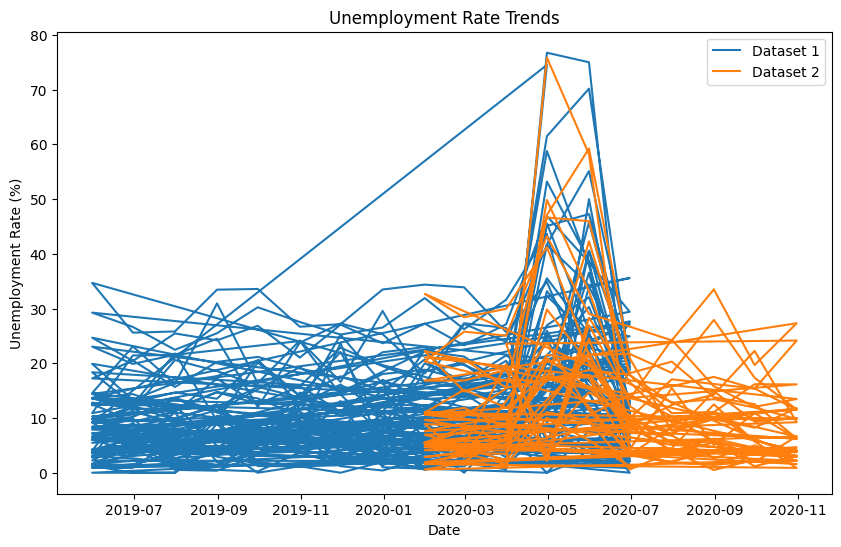

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(dataset1['date'], dataset1['estimated_unemployment_rate_(%)'], label='Dataset 1')
plt.plot(dataset2['date'], dataset2['estimated_unemployment_rate_(%)'], label='Dataset 2')
plt.title('Unemployment Rate Trends')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

- ## Top 5 Regions with Highest Unemployment Rates

In [14]:
covid_period_start='2020-03-01'
covid_period_end='2020-12-31'
covid_data1=dataset1[(dataset1['date']>=covid_period_start)&(dataset1['date']<=covid_period_end)]
covid_data2=dataset2[(dataset2['date']>=covid_period_start)&(dataset2['date']<=covid_period_end)]
top_regions1=covid_data1.groupby('region')['estimated_unemployment_rate_(%)'].mean().sort_values(ascending=False).head(5)
top_regions2=covid_data2.groupby('region')['estimated_unemployment_rate_(%)'].mean().sort_values(ascending=False).head(5)

print("Top 5 Regions with Highest Unemployment Rates (Dataset 1):")
print(top_regions1)
print("\nTop 5 Regions with Highest Unemployment Rates (Dataset 2):")
print(top_regions2)


Top 5 Regions with Highest Unemployment Rates (Dataset 1):
region
Puducherry    38.95500
Jharkhand     36.34875
Haryana       34.65250
Bihar         31.63125
Tripura       26.70250
Name: estimated_unemployment_rate_(%), dtype: float64

Top 5 Regions with Highest Unemployment Rates (Dataset 2):
region
Haryana       28.58250
Tripura       23.68500
Puducherry    22.13500
Bihar         21.72625
Jharkhand     21.61625
Name: estimated_unemployment_rate_(%), dtype: float64


- ### Visualize Regional Impact

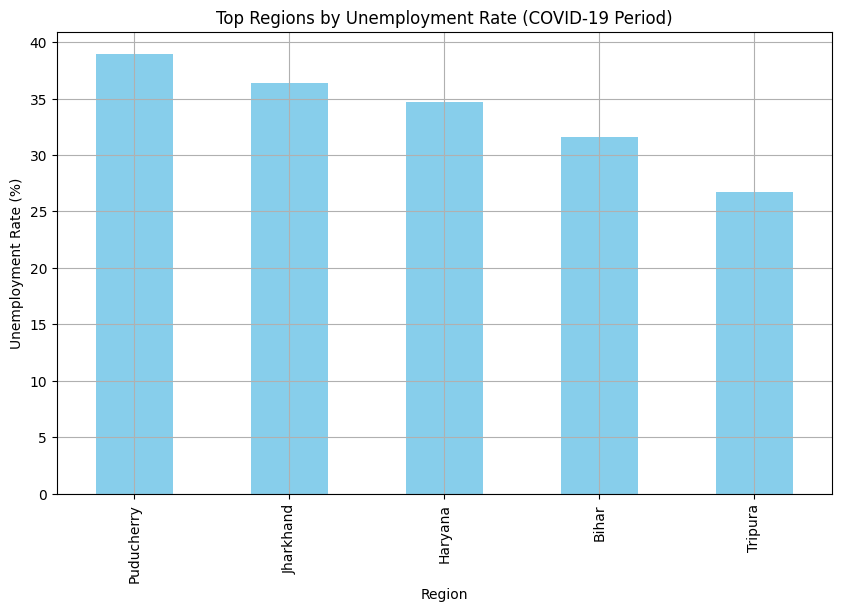

In [15]:
plt.figure(figsize=(10, 6))
top_regions1.plot(kind='bar', color='skyblue', label='Dataset 1')
plt.title('Top Regions by Unemployment Rate (COVID-19 Period)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Region')
plt.grid()
plt.show()

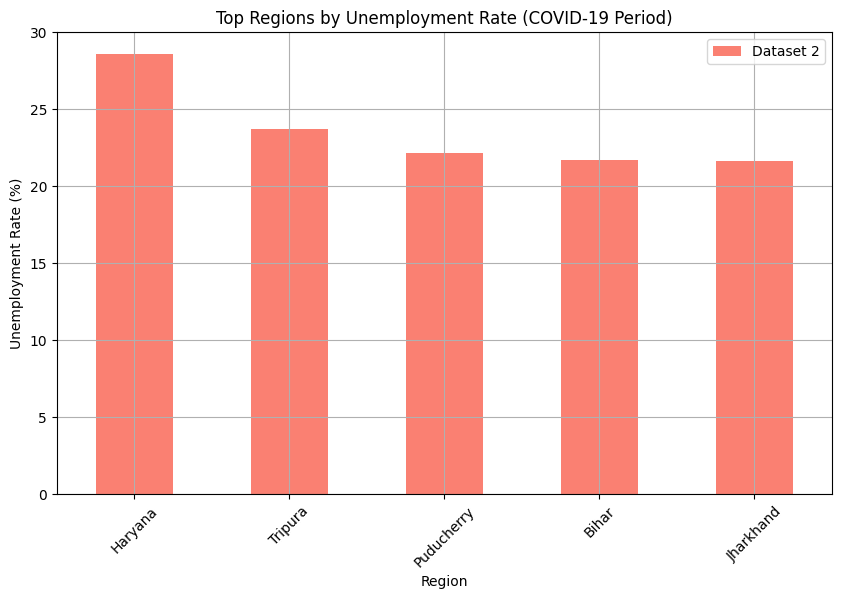

In [16]:
plt.figure(figsize=(10, 6))
top_regions2.plot(kind='bar', color='salmon', label='Dataset 2')
plt.title('Top Regions by Unemployment Rate (COVID-19 Period)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [17]:
region_means=dataset1.groupby('region')['estimated_unemployment_rate_(%)'].mean().reset_index()
data=region_means[['estimated_unemployment_rate_(%)']].values
kmeans=KMeans(n_clusters=3, random_state=42)
region_means['cluster']=kmeans.fit_predict(data)
print(region_means)


              region  estimated_unemployment_rate_(%)  cluster
0     Andhra Pradesh                         7.477143        1
1              Assam                         6.428077        1
2              Bihar                        18.918214        0
3         Chandigarh                        15.991667        0
4       Chhattisgarh                         9.240357        1
5              Delhi                        16.495357        0
6                Goa                         9.274167        1
7            Gujarat                         6.663929        1
8            Haryana                        26.283214        2
9   Himachal Pradesh                        18.540357        0
10   Jammu & Kashmir                        16.188571        0
11         Jharkhand                        20.585000        0
12         Karnataka                         6.676071        1
13            Kerala                        10.123929        1
14    Madhya Pradesh                         7.406429  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


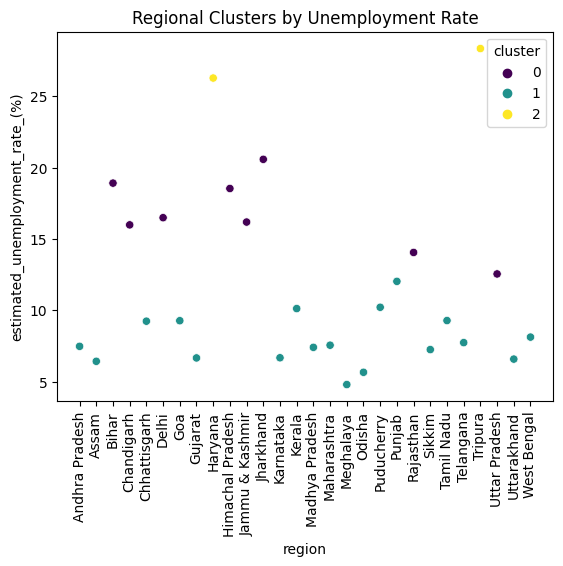

In [18]:
sns.scatterplot(data=region_means, x='region', y='estimated_unemployment_rate_(%)', hue='cluster', palette='viridis')
plt.xticks(rotation=90)
plt.title('Regional Clusters by Unemployment Rate')
plt.show()


In [19]:
covid_period_start = '2020-03-01'
covid_period_end = '2020-12-31'
covid_data1 = dataset1[(dataset1['date'] >= covid_period_start) & 
                               (dataset1['date'] <= covid_period_end)]
covid_data2 = dataset2[(dataset2['date'] >= covid_period_start) & 
                               (dataset2['date'] <= covid_period_end)]
top_regions1 = covid_data1.groupby('region')['estimated_unemployment_rate_(%)'].mean().sort_values(ascending=False).head(5)
top_regions2 = covid_data2.groupby('region')['estimated_unemployment_rate_(%)'].mean().sort_values(ascending=False).head(5)
top_regions1_set = set(top_regions1.index)
top_regions2_set = set(top_regions2.index)
common_regions = top_regions1_set.intersection(top_regions2_set)
print("Common Top Regions During COVID-19:")
print(common_regions)


Common Top Regions During COVID-19:
{'Bihar', 'Jharkhand', 'Tripura', 'Haryana', 'Puducherry'}


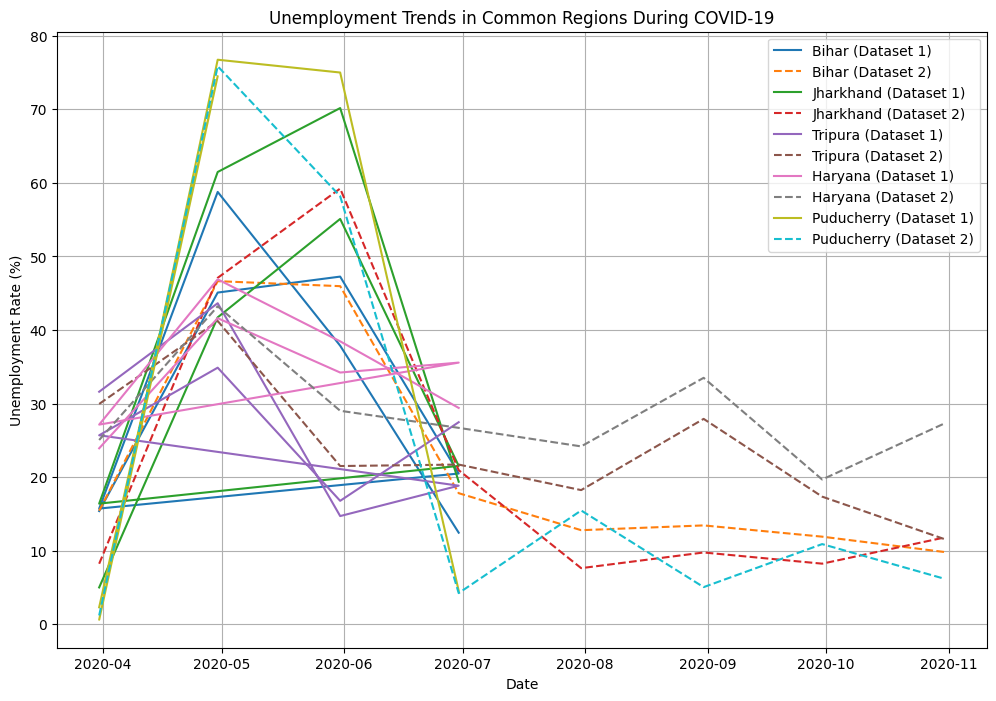

In [20]:
plt.figure(figsize=(12, 8))
for region in common_regions:
    region_data1 = covid_data1[covid_data1['region']==region]
    region_data2 = covid_data2[covid_data2['region']==region]
    plt.plot(region_data1['date'], region_data1['estimated_unemployment_rate_(%)'], label=f'{region} (Dataset 1)')
    plt.plot(region_data2['date'], region_data2['estimated_unemployment_rate_(%)'], linestyle='--', label=f'{region} (Dataset 2)')

plt.title('Unemployment Trends in Common Regions During COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid()
plt.show()


In [21]:
summary = {
    "Common Regions": list(common_regions),
    "Top 5 Regions (Dataset 1)": list(top_regions1.index),
    "Top 5 Regions (Dataset 2)": list(top_regions2.index),
    "Aligned Trends": "Yes" if len(common_regions) > 0 else "No discrepancies observed."
}

In [22]:
print("Unemployment Analysis During COVID-19")
print("-" * 50)
print(f"Common Regions in Top 5 (Both Datasets): {', '.join(summary['Common Regions'])}")
print(f"Top 5 Regions in Dataset 1: {', '.join(summary['Top 5 Regions (Dataset 1)'])}")
print(f"Top 5 Regions in Dataset 2: {', '.join(summary['Top 5 Regions (Dataset 2)'])}")
print("\nTrend Alignment:")
print(f"- {summary['Aligned Trends']}")
print("\nFuture Work:")
print("- Consider predictive modeling using ARIMA or LSTM for unemployment forecasting.")
print("- Explore clustering methods like k-means to group regions with similar unemployment trends.")


Unemployment Analysis During COVID-19
--------------------------------------------------
Common Regions in Top 5 (Both Datasets): Bihar, Jharkhand, Tripura, Haryana, Puducherry
Top 5 Regions in Dataset 1: Puducherry, Jharkhand, Haryana, Bihar, Tripura
Top 5 Regions in Dataset 2: Haryana, Tripura, Puducherry, Bihar, Jharkhand

Trend Alignment:
- Yes

Future Work:
- Consider predictive modeling using ARIMA or LSTM for unemployment forecasting.
- Explore clustering methods like k-means to group regions with similar unemployment trends.
